This is a text cell. Hit + Text above to make a text cell.

This is our Bisection method code from class on Thursday, January 23.

In [1]:
#This is a code cell. Hit + Code to make a code cell.
#this code block defines the function called my_bisection_method
#INPUTS: function my_func, a, b, TOL
#OUTPUTS: root or a error message
def my_bisection_method(my_func,a,b,TOL):
  if my_func(a) == 0:
    print("The root is {}".format(a))
    return a#this end the function
  if my_func(b) == 0:
    print("The root is {}".format(b))
    return b#this end the function
  if my_func(a)*my_func(b) > 0:
    print("Sign of f(a) and sign of f(b) must be opposite")
    return None#this end the function
  curr_iter = 1
  while (b-a)/2 > TOL:#current interval divided by two bigger than tol
    print("The current iteration is {}".format(curr_iter))
    print("The current error is = {}".format((b-a)/2))
    p = a + (b-a)/2
    print("The approximation p_k = {}".format(p))
    print("f(p_k) = {}".format(my_func(p)))
    if my_func(p)==0:
      print("The root is {}".format(p))
      return p#this end the function
    if my_func(a)*my_func(p)>0:
      a = p
    else:
      b = p
    curr_iter = curr_iter + 1
  #print("Current error is {}".format((b-a)/2))
  return p


We just wrote a function that carries out the Bisection Method. Now we want to implement it.

Let $f(x) = x^2 -2$ on the interval $[0,2]$.

In [ ]:
import numpy as np
my_func = lambda x:x**2-2
a = 0
b = 2
tol = 10e-3
print("The tolerance I am looking for is (b-a)/2 < {}".format(tol))
my_root = my_bisection_method(my_func, a,b, tol)
print("The root is {}".format(my_root))

The tolerance I am looking for is (b-a)/2 < 0.01
The current iteration is 1
The current error is = 1.0
The approximation p_k = 1.0
f(p_k) = -1.0
The current iteration is 2
The current error is = 0.5
The approximation p_k = 1.5
f(p_k) = 0.25
The current iteration is 3
The current error is = 0.25
The approximation p_k = 1.25
f(p_k) = -0.4375
The current iteration is 4
The current error is = 0.125
The approximation p_k = 1.375
f(p_k) = -0.109375
The current iteration is 5
The current error is = 0.0625
The approximation p_k = 1.4375
f(p_k) = 0.06640625
The current iteration is 6
The current error is = 0.03125
The approximation p_k = 1.40625
f(p_k) = -0.0224609375
The current iteration is 7
The current error is = 0.015625
The approximation p_k = 1.421875
f(p_k) = 0.021728515625
The root is 1.421875


Here are some examples of how to access different function in the numpy library.

In [ ]:
import numpy as np
#want to use the sin(x)
my_sin_func = lambda x: np.sin(x)
#want to use to natural log function
my_log_func = lambda x: np.log(x)#natural log function
#want to use the exponential function
my_exponential_func = lambda x: np.exp(x)#exponential function

In [ ]:
import numpy as np
my_func = lambda x: np.sin(x)+x**2-2*np.log(x)-5
my_root = my_bisection_method(my_func, .001,5, 10e-3)
print("The root is {}".format(my_root))

Sign of f(a) and sign of f(b) must be opposite
The root is None


By the clunky proof from class on page 9 of the Guided Notes, we can determine the number of iterations we need for the Bisection method to converge to a root:
$$\log_2(\frac{b-a}{\epsilon})< n.$$
So for the polynomial $f(x) = x^3+4x^2-10$ on $[1,2]$

In [ ]:
import numpy as np
b = 2
a = 1
tol = 10e-3
np.log2((b-a)/tol)

6.643856189774724

In this case we get $n > 6$, we could add the number of iterations as an input to our bisection method if we wanted to be cool.

In [ ]:
#let's test to see how many iterations it takes.
my_func = lambda x: x**3+4*x**2-10
my_root = my_bisection_method(my_func, 1,2, 10e-3)
print("The root is {}".format(my_root))

p_k = 1.5
f(p_k) = 2.375
The number of iterations is 1
p_k = 1.25
f(p_k) = -1.796875
The number of iterations is 2
p_k = 1.375
f(p_k) = 0.162109375
The number of iterations is 3
p_k = 1.3125
f(p_k) = -0.848388671875
The number of iterations is 4
p_k = 1.34375
f(p_k) = -0.350982666015625
The number of iterations is 5
p_k = 1.359375
f(p_k) = -0.09640884399414062
The number of iterations is 6
The root is 1.359375


We are going to do some error analysis. Let $p_n$ be approximation at step $n$, $p$ is the exact root.

$p_n-p$ we call this the **exact error**.

$|p_n-p|$ we call this the **absolute error**.

$\frac{|p_n-p|}{|p|}$ we call this the **relative error**.

We are going to use this example to learn how to store information from the while loop and then plot it.

Exercise 1.2.4 on page 11 of the notes. We are working with the function $x^2 - 2 = 0$.

In [ ]:
import numpy as np
#This is a code cell. Hit + Code to make a code cell.
#this code block defines the function called my_bisection_method
#INPUTS: function my_func, a, b, TOL, exact root, vector to hold approximatoins
#OUTPUTS: root or a error message
def my_bisection_method(my_func,a,b,TOL,exact_root):
  if my_func(a) == 0:
    print("The root is {}".format(a))
    return a#this end the function
  if my_func(b) == 0:
    print("The root is {}".format(b))
    return b#this end the function
  if my_func(a)*my_func(b) > 0:
    print("Sign of f(a) and sign of f(b) must be opposite")
    return None#this end the function
  curr_iter = 1
  error_vec = []
  while (b-a)/2 > TOL:#current interval divided by two bigger than tol
    #print("The current iteration is {}".format(curr_iter))
    #print("The current error is = {}".format((b-a)/2))
    p = a + (b-a)/2
    #compute |approximate root - exact root|
    abs_error = np.abs(p-exact_root)
    error_vec.append(abs_error)
    #print("The approximation p_k = {}".format(p))
    #print("f(p_k) = {}".format(my_func(p)))
    if my_func(p)==0:
      print("The root is {}".format(p))
      return p#this end the function
    if my_func(a)*my_func(p)>0:
      a = p
    else:
      b = p
    curr_iter = curr_iter + 1
  #print("Current error is {}".format((b-a)/2))
  return p, error_vec


In [ ]:
import numpy as np
my_func = lambda x:x**2-2
a = 0
b = 2
tol = 10e-3
error_vec = []
exact_root = np.sqrt(2)
print("The tolerance I am looking for is (b-a)/2 < {}".format(tol))
my_root,error_vec = my_bisection_method(my_func, a,b, tol, exact_root)
print("The root is {}".format(my_root))

The tolerance I am looking for is (b-a)/2 < 0.01
The root is 1.421875


This next code cell is going to teach us how to plot stuff in Python.

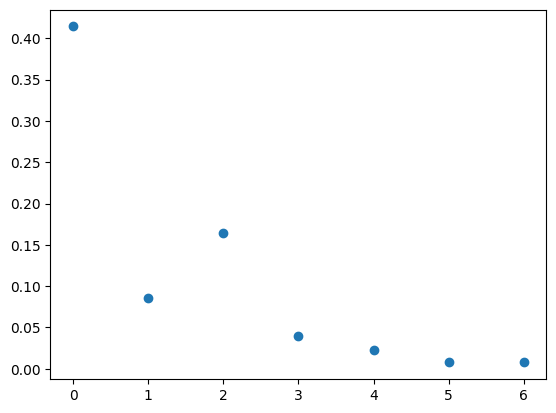

In [ ]:
import matplotlib.pyplot as plt
#put the absolute error on the vertical axis and the iteration number on the horizontal axis
#plt.scatter(x_vals, y_vals)
#range(len(error_vec)) makes a list of numbers from 0 to length of the error_vec-1
plt.scatter(range(len(error_vec)),error_vec)
